<a href="https://colab.research.google.com/github/sarahnolan15/APA-Project-/blob/main/ThesisEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Data

In [181]:
import pandas as pd
  
df = pd.read_csv('heart.csv')
df
#HEART DISEASE 0 = Normal, 1 = Heart Disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initial Exploration



In [183]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [185]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [186]:
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


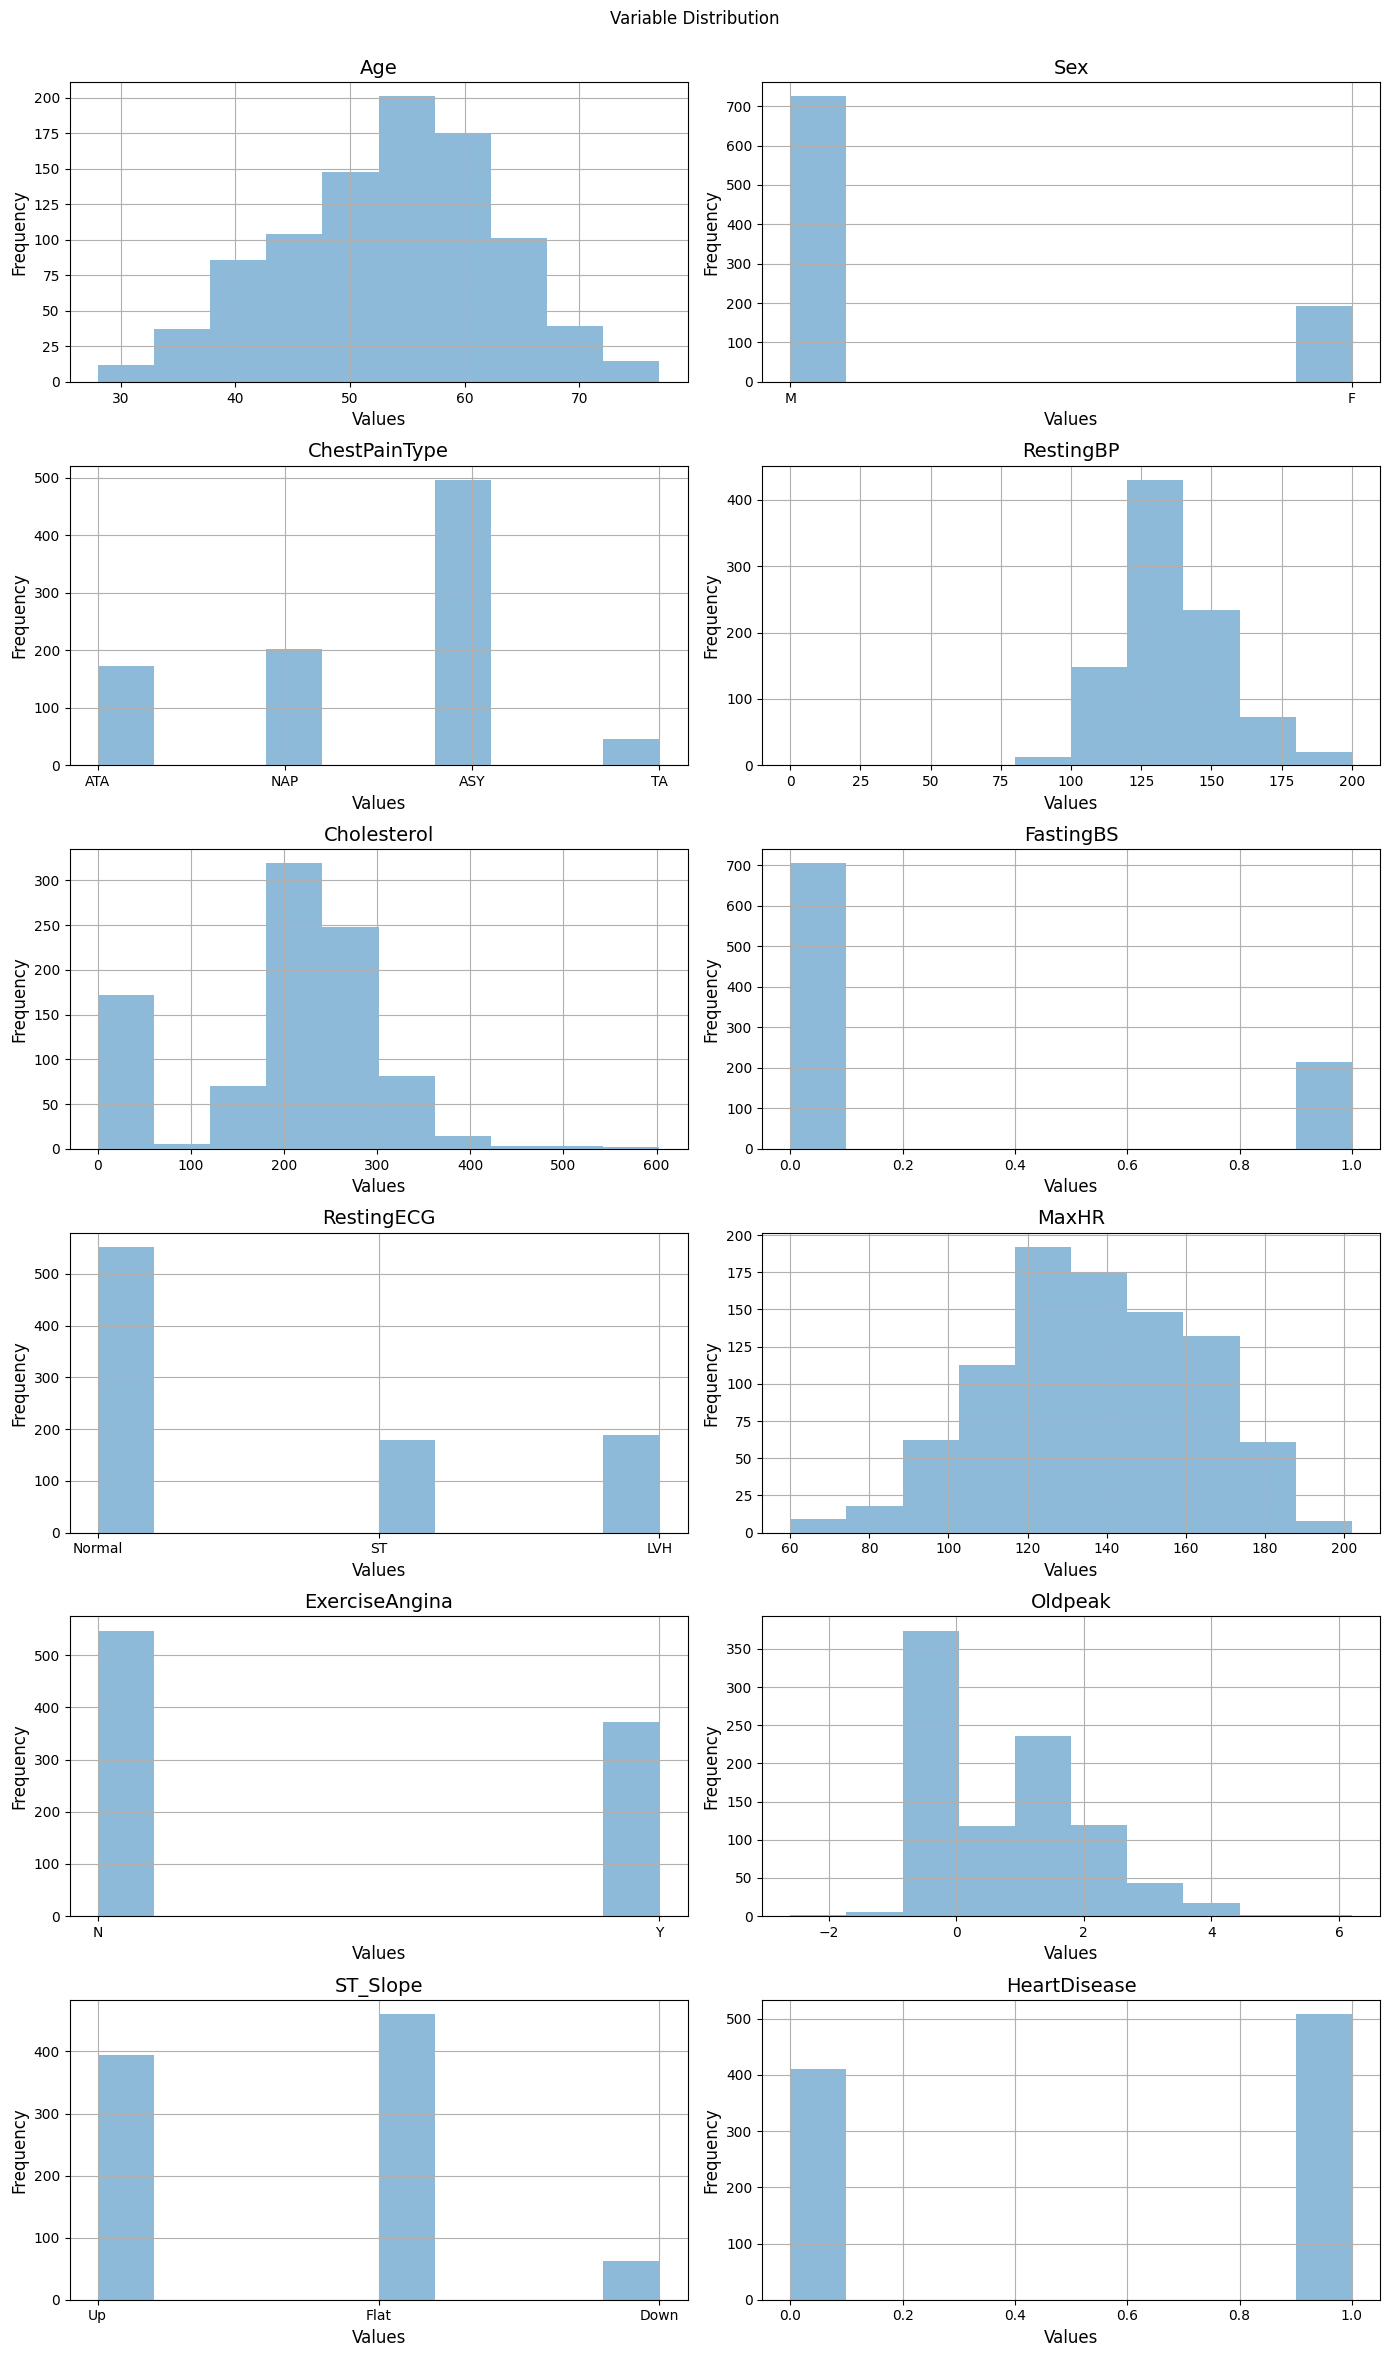

In [187]:
list_columns = list(df.columns)

fig, axs = plt.subplots(6, 2, figsize=(14, 24))
fig.suptitle('Variable Distribution')

for i, column in enumerate(list_columns):
    ax = axs.flat[i]
    ax.hist(df[column], color = '#1f77b4', alpha = 0.5)
    ax.set_title(column, fontsize = 14)
    ax.set_xlabel('Values', fontsize = 12)
    ax.set_ylabel('Frequency', fontsize = 12)
    ax.grid(True)
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)

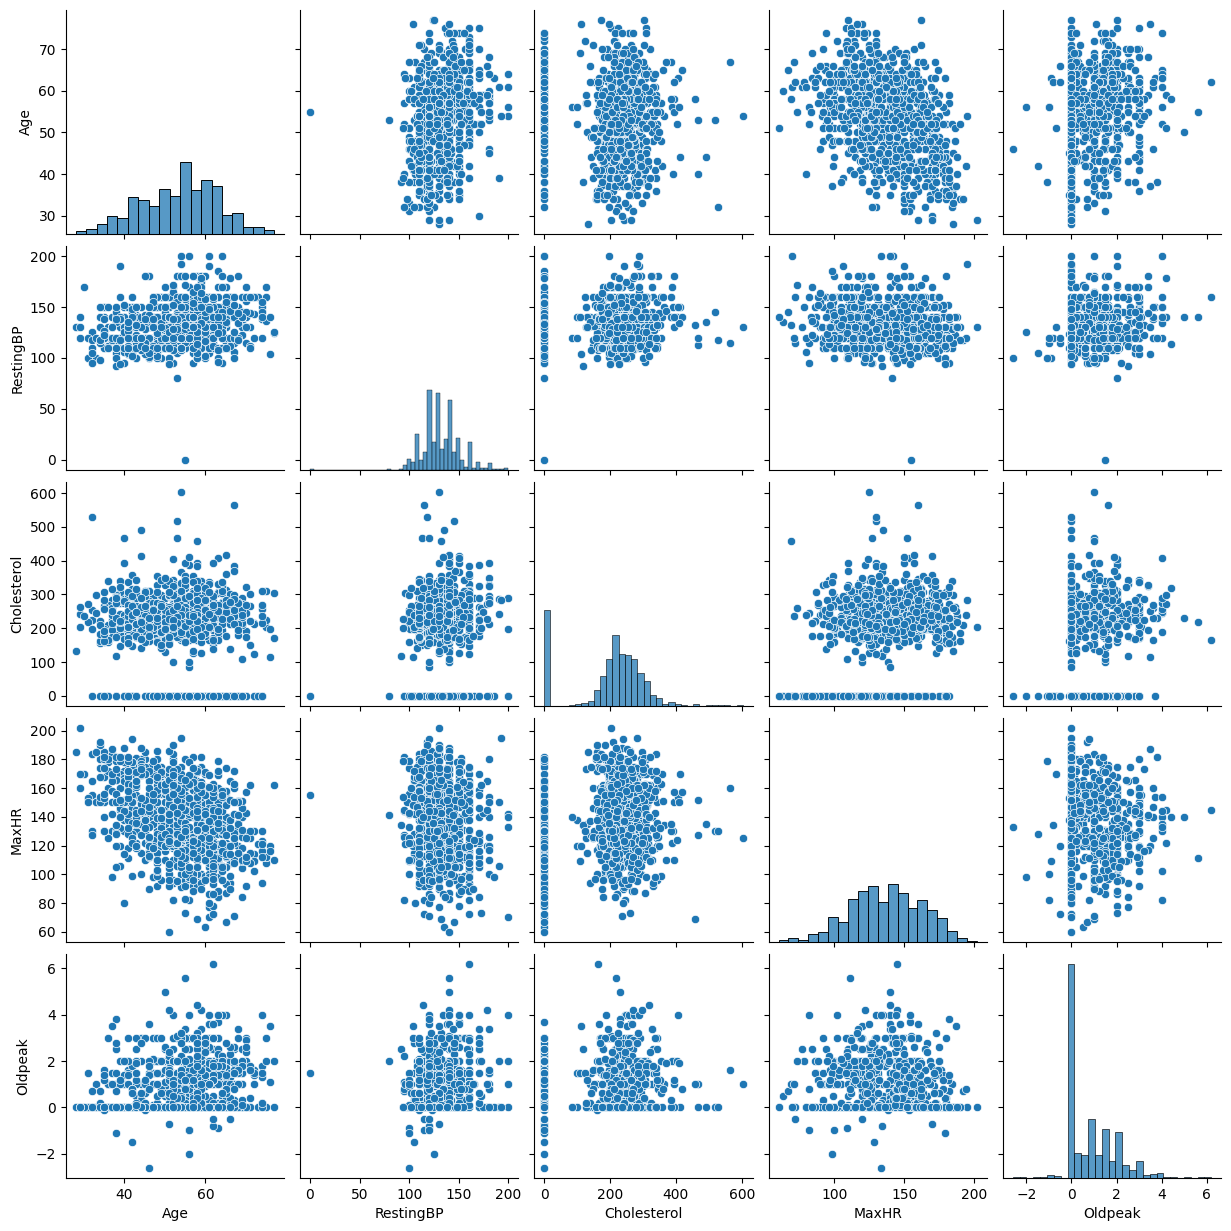

In [188]:
continuous = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

sns.pairplot(continuous)

# Outliers

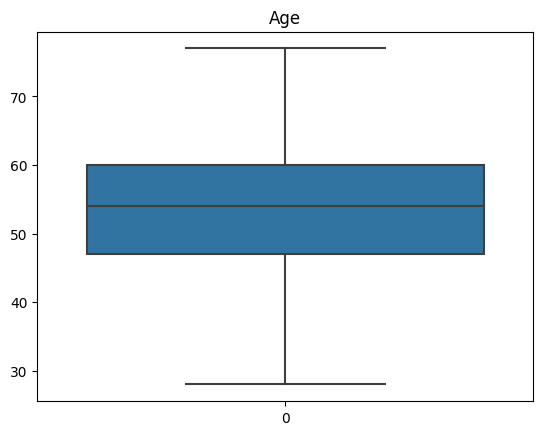

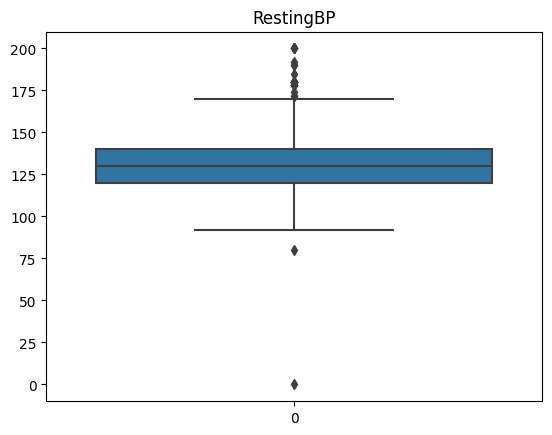

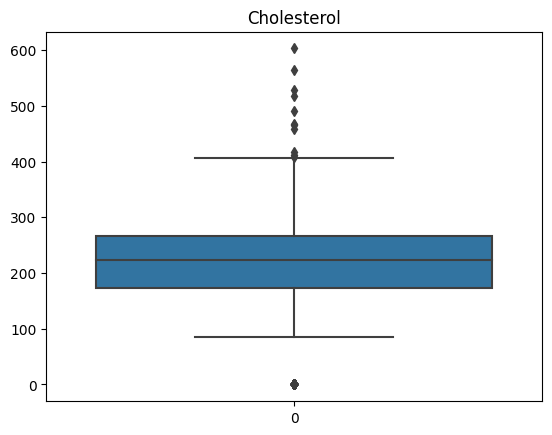

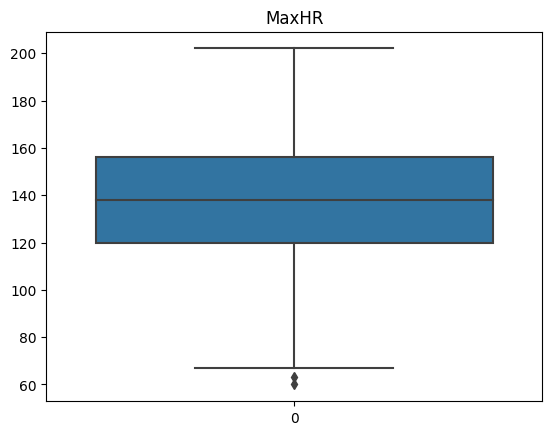

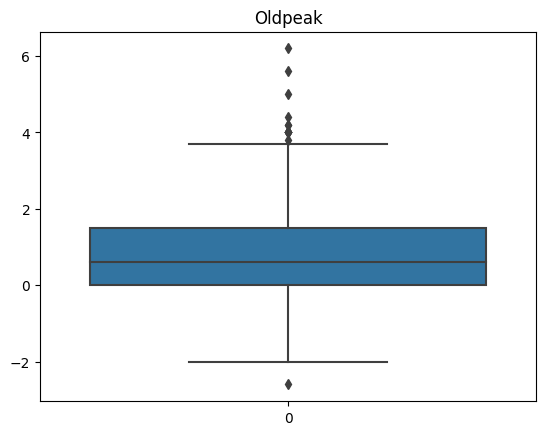

In [189]:
for column in continuous:
    sns.boxplot(data = df[column])
    plt.title(column)
    plt.show()

In [190]:
outliers = ['Oldpeak', 'MaxHR', 'Cholesterol', 'RestingBP']

for column in outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]

<Axes: >

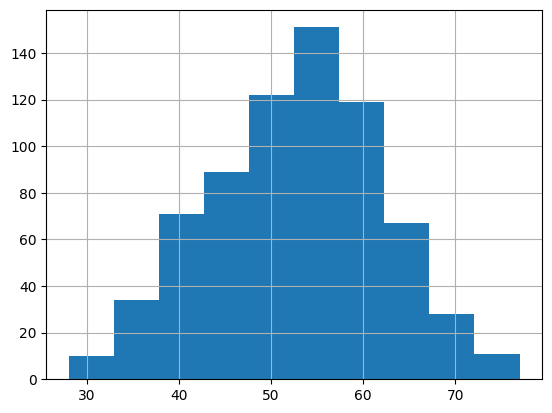

In [191]:
df['Age'].hist()

<Axes: >

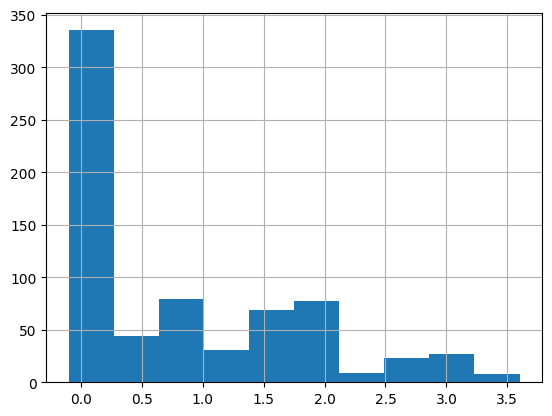

In [192]:
df['Oldpeak'].hist()

<Axes: >

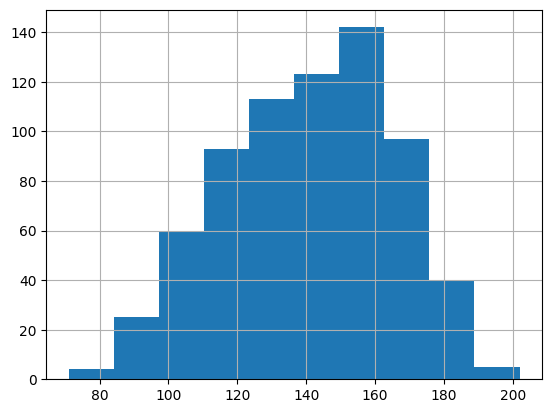

In [193]:
df['MaxHR'].hist()

<Axes: >

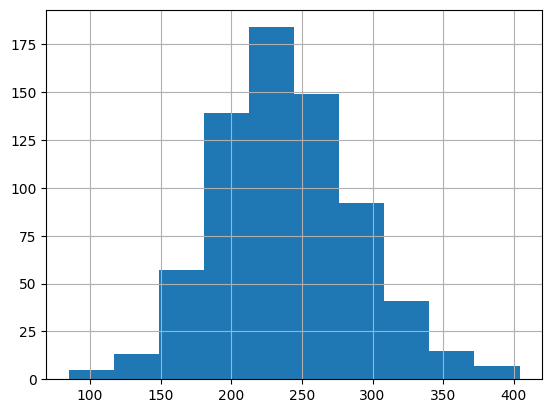

In [194]:
df['Cholesterol'].hist()

<Axes: >

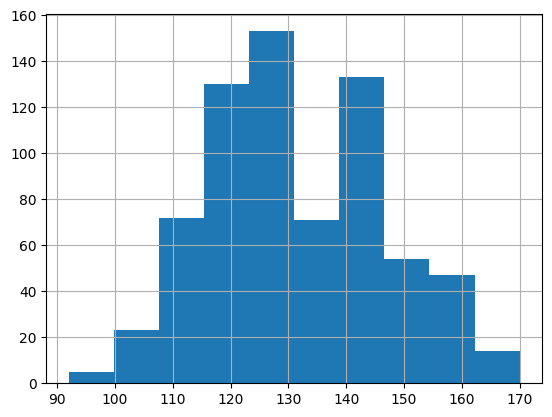

In [195]:
df['RestingBP'].hist()

# Visual Plots

<Axes: title={'center': 'Sex Comparison by Heart Disease'}, xlabel='HeartDisease', ylabel='Sex'>

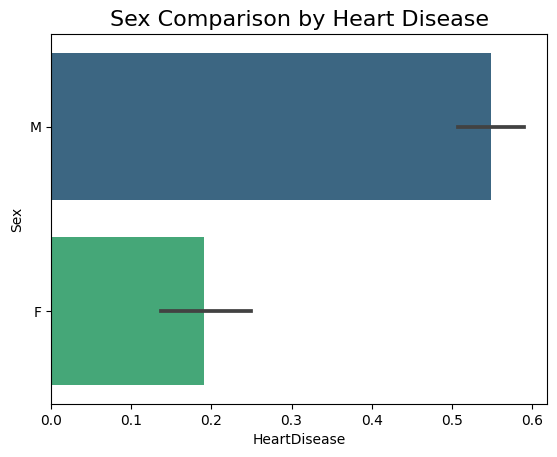

In [196]:
plt.title("Sex Comparison by Heart Disease", fontsize=16)
sns.barplot(x = 'HeartDisease', y = 'Sex', data = df, palette = 'viridis')

<Axes: title={'center': 'ChestPainType Comparison by Heart Disease'}, xlabel='HeartDisease', ylabel='ChestPainType'>

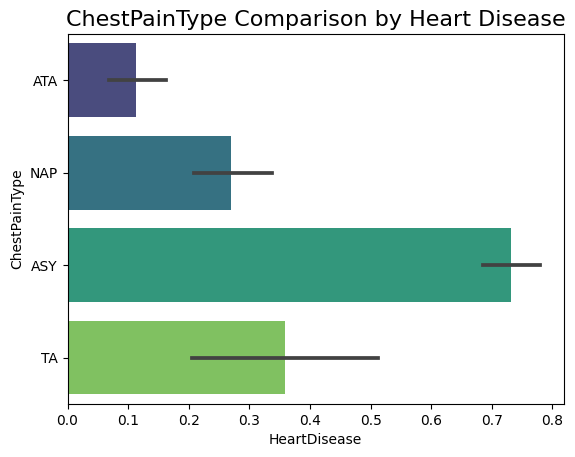

In [197]:
plt.title("ChestPainType Comparison by Heart Disease", fontsize=16)
sns.barplot(x = 'HeartDisease', y = 'ChestPainType', data = df, palette = 'viridis')

<Axes: title={'center': 'RestingECG Comparison by Heart Disease'}, xlabel='HeartDisease', ylabel='RestingECG'>

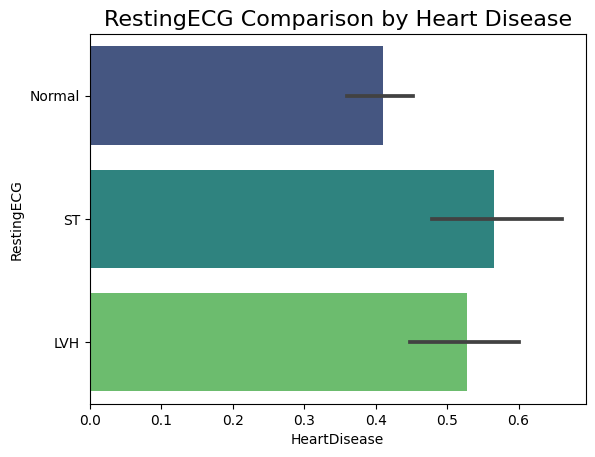

In [198]:
plt.title("RestingECG Comparison by Heart Disease", fontsize=16)
sns.barplot(x = 'HeartDisease', y = 'RestingECG', data = df, palette = 'viridis')

<Axes: title={'center': 'ExerciseAngina Comparison by Heart Disease'}, xlabel='HeartDisease', ylabel='ExerciseAngina'>

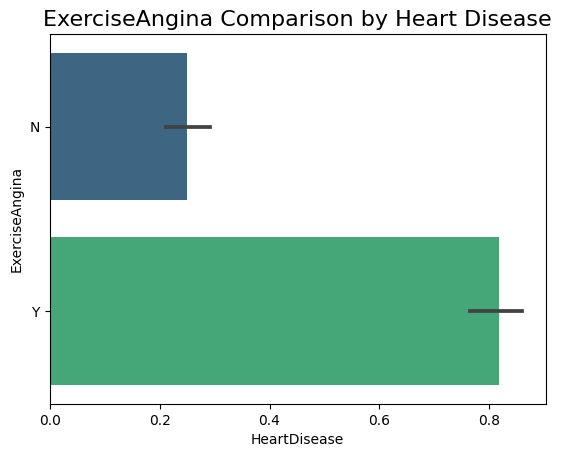

In [199]:
plt.title("ExerciseAngina Comparison by Heart Disease", fontsize=16)
sns.barplot(x = 'HeartDisease', y = 'ExerciseAngina', data = df, palette = 'viridis')

<Axes: title={'center': 'Age Distribution by Heart Disease'}, xlabel='Age', ylabel='HeartDisease'>

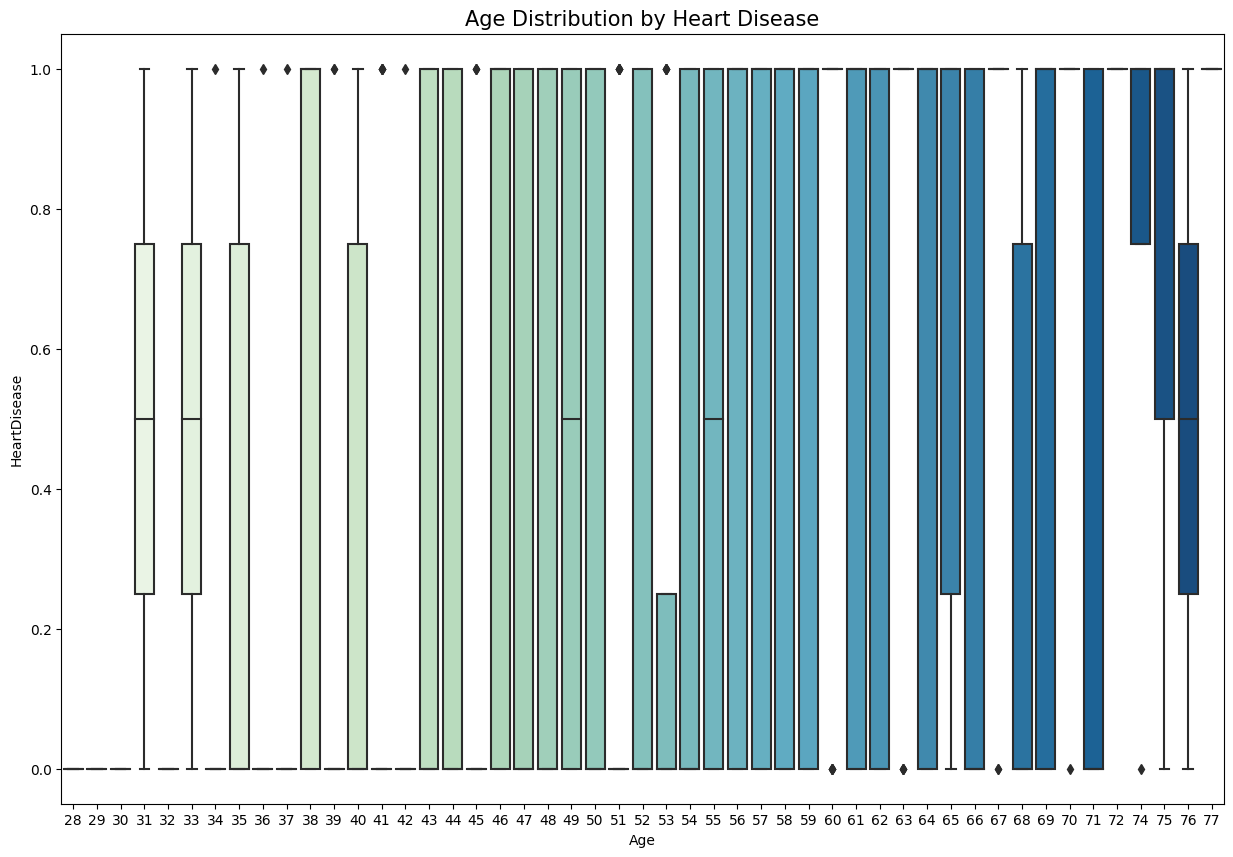

In [200]:
plt.figure(figsize = (15, 10))
plt.title('Age Distribution by Heart Disease', fontsize = 15)
sns.boxplot(x = 'Age', y = 'HeartDisease', palette = 'GnBu', data = df.query("Age > 0"))

<Axes: >

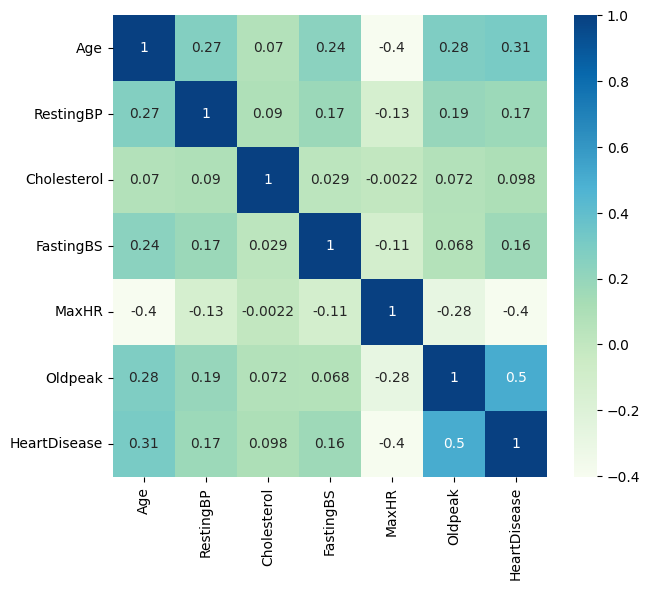

In [201]:
plt.figure(figsize = (7, 6))
sns.heatmap(df.corr(), cmap='GnBu', annot=True)

# **Data Encoding**

In [202]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']] = oe.fit_transform(df[['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,3.0,110,264,0,1.0,132,0.0,1.2,1.0,1
914,68,1.0,0.0,144,193,1,1.0,141,0.0,3.4,1.0,1
915,57,1.0,0.0,130,131,0,1.0,115,1.0,1.2,1.0,1
916,57,0.0,1.0,130,236,0,0.0,174,0.0,0.0,1.0,1


In [203]:
df.dtypes

Age                 int64
Sex               float64
ChestPainType     float64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG        float64
MaxHR               int64
ExerciseAngina    float64
Oldpeak           float64
ST_Slope          float64
HeartDisease        int64
dtype: object

In [204]:
x = df.drop(['HeartDisease'], axis = 1)
y = df['HeartDisease']

print(x.shape)
print(y.shape)

(702, 11)
(702,)


In [205]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=23)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)
#80/20 split

(702, 11)
(561, 11)
(141, 11)
(702,)
(561,)
(141,)


In [206]:
print(df['HeartDisease'].value_counts())
#imbalanced
#more people in the dataset with heart disease

0    377
1    325
Name: HeartDisease, dtype: int64


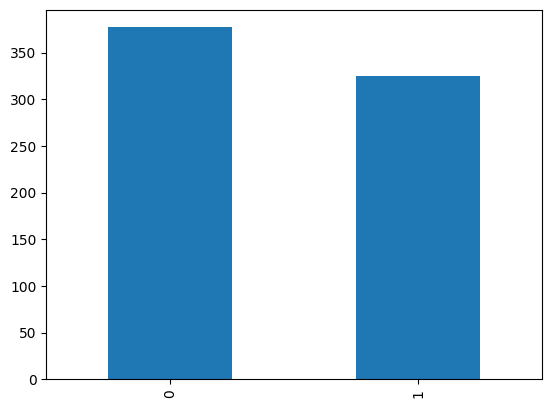

In [207]:
import matplotlib.pyplot as plt
%matplotlib inline

df['HeartDisease'].value_counts().plot.bar()
plt.show()

# **Logistic Regression**

In [208]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
print(lr_model.fit(x_train, y_train))

LogisticRegression()


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [209]:
lr_y_pred = lr_model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.851063829787234


In [210]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_confusion_matrix = confusion_matrix(y_test, lr_y_pred)
print(lr_confusion_matrix)

[[68 12]
 [ 9 52]]


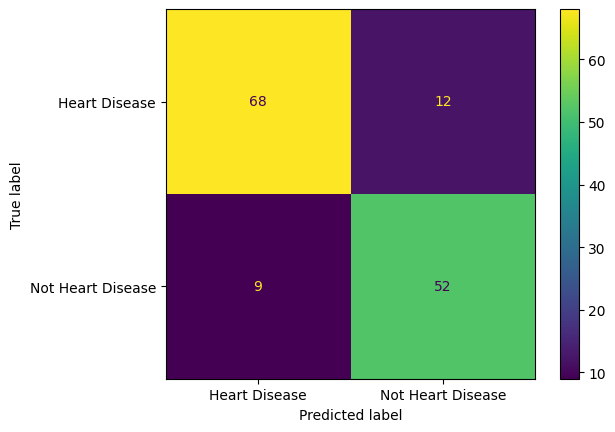

In [211]:
#Visual
labels = ["Heart Disease", "Not Heart Disease"]
#cm = confusion_matrix(y_test, lr_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= lr_confusion_matrix, display_labels=labels)
disp.plot();

In [212]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        80
           1       0.81      0.85      0.83        61

    accuracy                           0.85       141
   macro avg       0.85      0.85      0.85       141
weighted avg       0.85      0.85      0.85       141



In [213]:
#Hyperparameter Tuning
#from sklearn.model_selection import RandomizedSearchCV
#param_dist = {#'n_estimators': randint(50,500),
             #'max_depth': randint(1,20)}
#{uniform(loc=0, scale=4),
 #            penalty=['l2', 'l1'] }
            

# Create a random forest classifier
#lr = LogisticRegression()

# Use random search to find the best hyperparameters
#rand_search = RandomizedSearchCV(lr, 
 #                                param_distributions = param_dist, 
  #                               n_iter=5, 
   #                              cv=5)

# Fit the random search object to the data
#rand_search.fit(x_train, y_train)

In [214]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'penalty' : ['l2']}
  #'n_estimators': randint(50,500),
             # 'max_depth': randint(1,20)
              #'priors': 
              #'var_smoothing': np.logspace(0,-9, num=100)}
            

# Create a random forest classifier
lr = LogisticRegression()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(lr, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'penalty': ['l2']})

# **Naive Bayes**

In [215]:
#Fit
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
print(nb_model.fit(x_train, y_train))

GaussianNB()


In [216]:
#Prediction
nb_y_pred = nb_model.predict(x_test)

accuracy = accuracy_score(y_test, nb_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8368794326241135


In [217]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_confusion_matrix = confusion_matrix(y_test, nb_y_pred)
print(nb_confusion_matrix)

[[67 13]
 [10 51]]


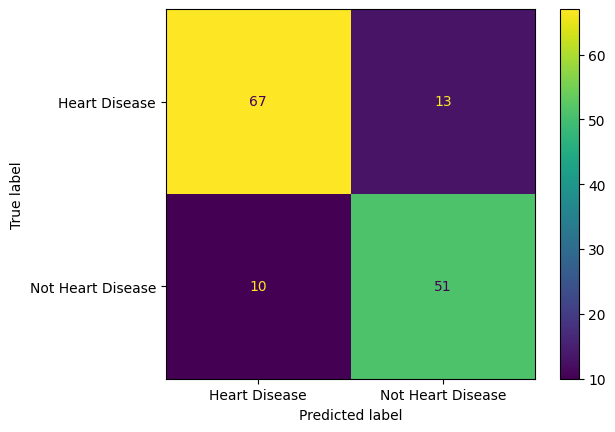

In [218]:
#Visual
labels = ["Heart Disease", "Not Heart Disease"]
#cm = confusion_matrix(y_test, nb_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= nb_confusion_matrix, display_labels=labels)
disp.plot();

In [219]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        80
           1       0.80      0.84      0.82        61

    accuracy                           0.84       141
   macro avg       0.83      0.84      0.83       141
weighted avg       0.84      0.84      0.84       141



In [220]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
param_dist = {#'n_estimators': randint(50,500),
             # 'max_depth': randint(1,20)
              #'priors': 
              'var_smoothing': np.logspace(0,-9, num=100)}
            

# Create a random forest classifier
nb = GaussianNB()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(nb, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=5,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [221]:
# Create a variable for the best model
best_nb = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'var_smoothing': 5.3366992312063123e-05}


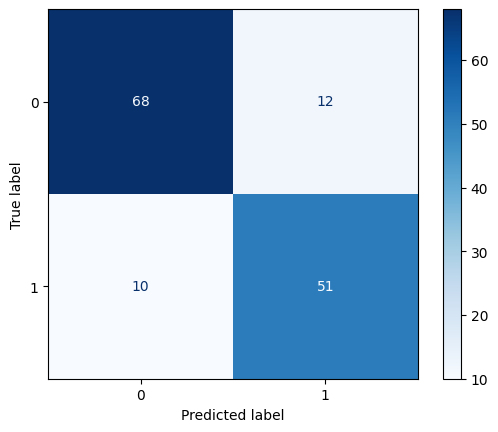

In [222]:
#Evaluation Metrics

# Generate predictions with the best model
y_pred_2 = best_nb.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_2)

ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap= 'Blues');

In [223]:
y_pred_2 = best_nb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_2)
precision = precision_score(y_test, y_pred_2)
recall = recall_score(y_test, y_pred_2)
f1 = f1_score(y_test, y_pred_2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1-Score:", f1)

Accuracy: 0.8439716312056738
Precision: 0.8095238095238095
Recall: 0.8360655737704918
f1-Score: 0.8225806451612904


# **Random** **Forest**

In [224]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [225]:
#Fit
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
print(rf_model.fit(x_train, y_train))

RandomForestClassifier()


In [226]:
#Prediction
rf_y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8723404255319149


In [227]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)
print(rf_confusion_matrix)

[[67 13]
 [ 5 56]]


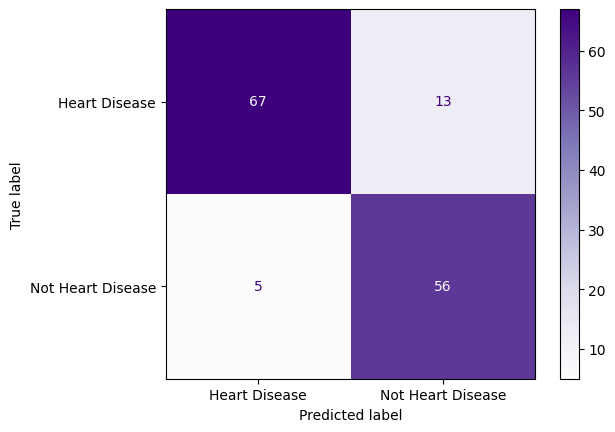

In [228]:
#Visual
labels = ["Heart Disease", "Not Heart Disease"]
cm = confusion_matrix(y_test, rf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= rf_confusion_matrix, display_labels=labels)
disp.plot(cmap= 'Purples')
#disp.plot();

In [229]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        80
           1       0.81      0.92      0.86        61

    accuracy                           0.87       141
   macro avg       0.87      0.88      0.87       141
weighted avg       0.88      0.87      0.87       141



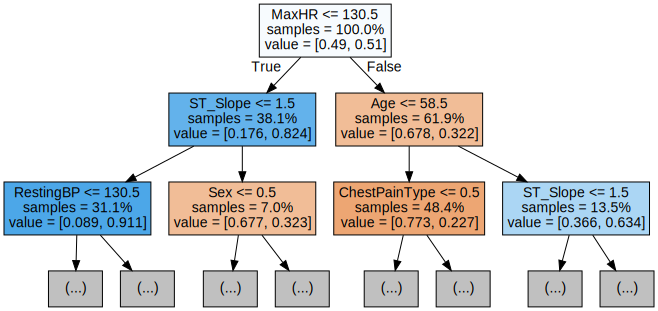

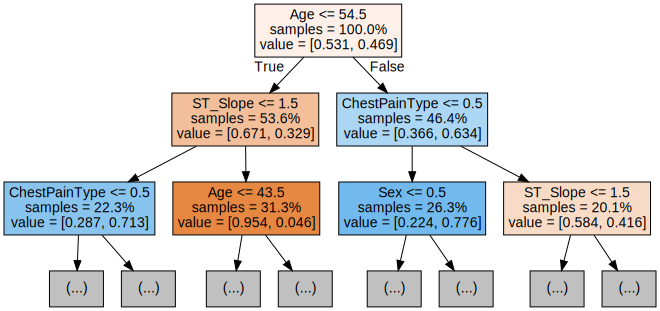

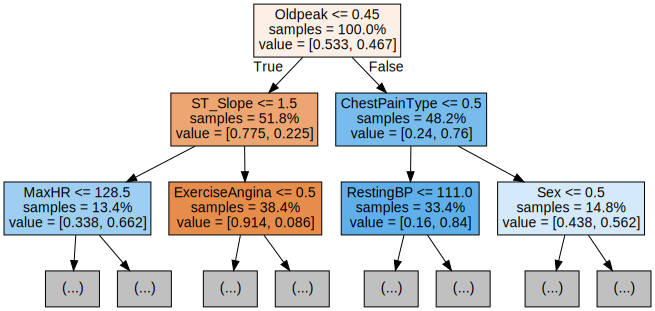

In [230]:
#Visual
for i in range(3):
    tree = rf_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [231]:
#import numpy as np

#from sklearn.model_selection import RandomizedSearchCV

#rf_grid = {'n_estimators': np.arange(10, 100, 10),
#           'max_depth': [None, 3, 5, 10],
#           #'min_sample_split': np.arange(2, 20, 2),
#           'min_samples_leaf': np.arange(1, 20, 2),
#           'max_features': [0.5, 1, 'sqrt', 'auto'],
#           'max_samples': [100]}

#rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,
#                                                    random_state=42),
#                              param_distributions=rf_grid,
#                              n_iter=5,
#                              cv=5,
#                              verbose=True)
#rs_model.fit(x_train, y_train)

In [232]:
#rs_model.best_params_

In [233]:
#show_scores(rs_model)

In [252]:
#Hyperparameter Tuning

param_dist = {'n_estimators': np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           #'min_sample_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           #'max_features': ['sqrt'],
           'max_features': [0.5, 1, 'sqrt', 'auto'],
           'max_samples': [400]}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=param_dist,
                              n_iter=5,
                              cv=5,
                              verbose=True)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt'],
                                        'max_samples': [400],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [247]:
#Hyperparameter Tuning

#param_dist = {"max_depth": [3, None],
#              "max_features": [1, 3, 10],
#              "min_samples_split": [1, 3, 10],
#              "min_samples_leaf": [1, 3, 10],
#              # "bootstrap": [True, False],
#              "criterion": ["gini", "entropy"]}


#    'n_estimators': [100, 400, 800],
 #   'max_depth': [3, 6, 9],
  #  'learning_rate': [0.05, 0.1, 0.20],
   # 'min_child_weight': [1, 10, 100]
    

# {'n_estimators': randint(50,500),
             # 'max_depth': randint(1,20)

# Create a random forest classifier
#rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
#rand_search = RandomizedSearchCV(rf, 
 #                                param_distributions = param_dist, 
  #                               n_iter=5, 
   #                              cv=5)

# Fit the random search object to the data
#rand_search.fit(x_train, y_train)

In [253]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_samples': 400, 'max_features': 'sqrt', 'max_depth': None}


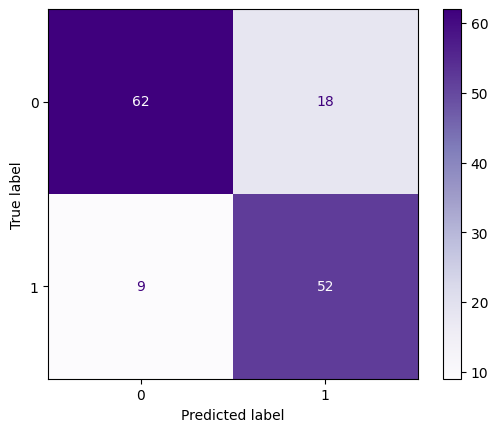

In [254]:
#Evaluation Metrics

# Generate predictions with the best model
y_pred_3 = best_rf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_3)

ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap= 'Purples');

In [255]:
y_pred_3 = best_rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_3)
precision = precision_score(y_test, y_pred_3)
recall = recall_score(y_test, y_pred_3)
f1 = f1_score(y_test, y_pred_3)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1-Score:", f1)

Accuracy: 0.8085106382978723
Precision: 0.7428571428571429
Recall: 0.8524590163934426
f1-Score: 0.7938931297709924


In [239]:
#grid search

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [6,8,12],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2,4, 5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 500, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [240]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: ignored

In [ ]:
grid_search.best_estimator_

In [ ]:
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
best_grid = grid_search.best_estimator_
pred = best_grid.predict(x_test)
mean_squared_error(y_test, pred)

# **kNearest Neighbour**

In [ ]:
#Fit
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier() #(n_neighbors=4)
print(knn_model.fit(x_train, y_train))

In [ ]:
#Prediction
knn_y_pred = knn_model.predict(x_test)

accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy:", accuracy)

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_test, knn_y_pred)
print(knn_confusion_matrix)

In [ ]:
#Visual
labels = ["Heart Disease", "Not Heart Disease"]
#cm = confusion_matrix(y_test, knn_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= knn_confusion_matrix, display_labels=labels)
disp.plot();

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_y_pred))

In [ ]:
#Cross Validation

k_values = [i for i in range (1,50)]
scores = []
from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X)
scaler = StandardScaler()
#X = StandardScaler().fit_transform(X)
X = scaler.fit_transform(x)

from sklearn.model_selection import cross_val_score

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

In [ ]:
import seaborn as sns
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
#Evaluation Matrix
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

In [ ]:
y_pred_4 = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_4)
precision = precision_score(y_test, y_pred_4)
recall = recall_score(y_test, y_pred_4)
f1 = f1_score(y_test, y_pred_4)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1-Score:", f1)

# **XGBoost**

In [ ]:
#Fit
from xgboost import XGBClassifier
xgb_model = XGBClassifier( eval_metric='mlogloss')
print(xgb_model.fit(x_train, y_train))

In [ ]:
#Prediction
xgb_y_pred = xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, xgb_y_pred)
print("Accuracy:", accuracy)

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
xgb_confusion_matrix = confusion_matrix(y_test, xgb_y_pred)
print(xgb_confusion_matrix)

In [ ]:
#Visual
labels = ["Heart Disease", "Not Heart Disease"]
cm = confusion_matrix(y_test, xgb_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= xgb_confusion_matrix, display_labels=labels)
disp.plot();

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_y_pred))

In [ ]:
#Hyperparameter Tuning
import scipy.stats as stats

param_dist = {
            'max_depth': stats.randint(3, 10),
            'learning_rate': stats.uniform(0.01, 0.1),
            'subsample': stats.uniform(0.5, 0.5),
            'n_estimators':stats.randint(50, 200)
            }

#{"max_depth": [3, None],
 #             "max_features": [1, 3, 10],
  #            "min_samples_split": [1, 3, 10],
   #           "min_samples_leaf": [1, 3, 10],
              # "bootstrap": [True, False],
    #          "criterion": ["gini", "entropy"]}

#{'n_estimators': randint(50,500),
 #             'max_depth': randint(1,20)}

# Create a random forest classifier
xgb = XGBClassifier()

# Use random search to find the best hyperparameters
#random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy'
rand_search = RandomizedSearchCV(xgb, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

In [ ]:
# Create a variable for the best model
best_xgb = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

In [ ]:
#Evaluation Metrics

# Generate predictions with the best model
y_pred_5 = best_xgb.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_5)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
y_pred_5 = best_xgb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_5)
precision = precision_score(y_test, y_pred_5)
recall = recall_score(y_test, y_pred_5)
f1 = f1_score(y_test, y_pred_5)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1-Score:", f1)

# **Stacking**